# Intro to Data Science - Homework 4 - Fall 2024 - Wilmington College
## Due Date: April 05, 2024, 11:30 AM (Before the Start of Our Class)

Dear Students,

Welcome to Homework 4 for the Intro to Data Science course.

**Submission Instructions:**
Please complete the homework and commit your changes to GitHub. 

Last part of each problem dedicated to this question: "How long did it take you to solve this question? Was it easy, medium, or hard for you? Feel free to share any comments you have."

**Alternative Submission:**
If, for any reason, you are unable to use GitHub, you can submit your work via email.

Remember, timely completion of assignments is crucial for your understanding of the course material. If you face any challenges, don't hesitate to reach out.

###  Replace Employee ID With The Unique Identifier

You are given two tables: Employees and EmployeeUNI. The Employees table contains information about employees in a company, including their ID and name. The EmployeeUNI table contains the unique IDs corresponding to each employee. Your task is to show the unique ID of each employee, replacing null for those who do not have a unique ID.

# Input Data

## Employees table:
| id | name     |
|----|----------|
| 1  | Alice    |
| 7  | Bob      |
| 11 | Meir     |
| 90 | Winston  |
| 3  | Jonathan |

## EmployeeUNI table:
| id | unique_id |
|----|-----------|
| 3  | 1         |
| 11 | 2         |
| 90 | 3         |

# Approach

1. Read the input data into pandas DataFrames.
2. Merge the Employees and EmployeeUNI DataFrames on the 'id' column using a left join.
3. Fill missing values in the 'unique_id' column with 'null'.
4. Display the result table.


In [5]:
import pandas as pd

# Sample data
employees_data = {
    'id': [1, 7, 11, 90, 3],
    'name': ['Alice', 'Bob', 'Meir', 'Winston', 'Jonathan']
}

employeeuni_data = {
    'id': [3, 11, 90],
    'unique_id': [1, 2, 3]
}

# Create DataFrames
employees_df = pd.DataFrame(employees_data)
employeeuni_df = pd.DataFrame(employeeuni_data)
employees_df 

,id,name
0,1,Alice
1,7,Bob
2,11,Meir
3,90,Winston
4,3,Jonathan


In [4]:
employeeuni_df

,id,unique_id
0,3,1
1,11,2
2,90,3


In [12]:
result_df = pd.merge(employees_df, employeeuni_df, on="id", how="left")
result_df

,id,name,unique_id
0,1,Alice,NaN
1,7,Bob,NaN
2,11,Meir,2.0
3,90,Winston,3.0
4,3,Jonathan,1.0


In [15]:
# filling missing values in the 'unique_id' column with the string 'null'. 
result_df['unique_id'] = result_df["unique_id"].fillna("null")
result_df

,id,name,unique_id
0,1,Alice,null
1,7,Bob,null
2,11,Meir,2.0
3,90,Winston,3.0
4,3,Jonathan,1.0


In [16]:
result_df[["unique_id","name"]]

,unique_id,name
0,null,Alice
1,null,Bob
2,2.0,Meir
3,3.0,Winston
4,1.0,Jonathan


# 2. Product Sales Analysis I

Given the Sales and Product tables, you need to report the product_name, year, and price for each sale_id in the Sales table. Return the resulting table in any order.

Sales table:
| sale_id | product_id | year | quantity | price |
|---------|------------|------|----------|------- 
| 1       | 100        | 2008 | 10       | 5000  |
| 2       | 100        | 2009 | 12       | 5000  |
| 7       | 200        | 2011 | 15       | 9000  |

Product table:
| product_id | product_name |
------------|--------------
| 100        | Nokia        |
| 200        | Apple        |
| 300        | Samsung      |

Output: 

| product_name | year  | price |
|--------------|-------|-------|
| Nokia        | 2008  | 5000  |
| Nokia        | 2009  | 5000  |
| Apple        | 2011  | 9000  |


# Approach

1. Join the Sales and Product tables on the product_id column.
2. Select the product_name, year, and price columns from the joined table.
3. Return the resulting table.



In [2]:
# Solution:

import pandas as pd

# Sales table data
sales_data = {
    'sale_id': [1, 2, 7],
    'product_id': [100, 100, 200],
    'year': [2008, 2009, 2011],
    'quantity': [10, 12, 15],
    'price': [5000, 5000, 9000]
}

# Product table data
product_data = {
    'product_id': [100, 200, 300],
    'product_name': ['Nokia', 'Apple', 'Samsung']
}

# Convert data to pandas DataFrames
sales_df = pd.DataFrame(sales_data)
product_df = pd.DataFrame(product_data)

# Join Sales and Product tables on product_id column
merged_df = pd.merge(sales_df, product_df, on='product_id')

# Select the required columns
merged_df[['product_name', 'year', 'price']]




,product_name,year,price
0,Nokia,2008,5000
1,Nokia,2009,5000
2,Apple,2011,9000


# 3. Product Sales Analysis II

You are given two tables: `Sales` and `Product`.

Table: Sales

| Column Name | Type  |
|-------------|-------|
| sale_id     | int   |
| product_id  | int   |
| year        | int   |
| quantity    | int   |
| price       | int   |

- (sale_id, year) is the primary key (combination of columns with unique values) of this table.
- `product_id` is a foreign key (reference column) to the Product table.
- Each row of this table shows a sale on the product `product_id` in a certain year.
- Note that the price is per unit.

Table: Product

| Column Name  | Type    |
|--------------|---------|
| product_id   | int     |
| product_name | varchar |

- `product_id` is the primary key (column with unique values) of this table.
- Each row of this table indicates the product name of each product.

Write a solution to select the product id, year, quantity, and price for the first year of every product sold. Return the resulting table in any order.

**Example:**

**Input:**
Sales table:

| sale_id | product_id | year | quantity | price |
|---------|------------|------|----------|-------|
| 1       | 100        | 2008 | 10       | 5000  |
| 2       | 100        | 2009 | 12       | 5000  |
| 7       | 200        | 2011 | 15       | 9000  |

Product table:

| product_id | product_name |
|------------|--------------|
| 100        | Nokia        |
| 200        | Apple        |
| 300        | Samsung      |

**Output:**

| product_id | first_year | quantity | price |
|------------|------------|----------|-------|
| 100        | 2008       | 10       | 5000  |
| 200        | 2011       | 15       | 9000  |


In [4]:
# Solution:

import pandas as pd

# Sales table data
sales_data = {
    'sale_id': [1, 2, 7],
    'product_id': [100, 100, 200],
    'year': [2008, 2009, 2011],
    'quantity': [10, 12, 15],
    'price': [5000, 5000, 9000]
}

# Product table data
product_data = {
    'product_id': [100, 200, 300],
    'product_name': ['Nokia', 'Apple', 'Samsung']
}

# Convert data to pandas DataFrames
sales_df = pd.DataFrame(sales_data)
product_df = pd.DataFrame(product_data)

# Group sales data by product_id and find the minimum year for each product
first_year_df = sales_df.groupby('product_id')['year'].min().reset_index()

# Merge the first year information with sales data to get the quantity and price for the first year
result_df = pd.merge(first_year_df, sales_df, on=['product_id', 'year'], how='inner')

# Select required columns
result_df[['product_id', 'year', 'quantity', 'price']]

,product_id,year,quantity,price
0,100,2008,10,5000
1,200,2011,15,9000


# 4. Managers with at Least 5 Direct Reports

You are given a table, `Employee`, with the following structure and data:


| Column Name | Type    |
|-------------|---------
| id          | int     |
| name        | varchar |
| department  | varchar |
| managerId   | int     |


- `id` is the primary key for this table.
- Each row of this table represents an employee in the company. The `managerId` column contains the `id` of the employee's manager.
- If `managerId` is null, then the employee does not have a manager.
- No employee will be the manager of themself.

Write a Python code to find the names of managers who have at least five direct reports. Return the result table in any order.

**Example:**

**Input:**

Employee table:

| id  | name  | department | managerId |
-----|-------|------------|-----------
| 101 | John  | A          | null      |
| 102 | Dan   | A          | 101       |
| 103 | James | A          | 101       |
| 104 | Amy   | A          | 101       |
| 105 | Anne  | A          | 101       |
| 106 | Ron   | B          | 101       |


**Output:**


| name |
------
| John |


**Explanation:**

John is the only manager with at least five direct reports (Dan, James, Amy, Anne, and Ron).


In [5]:
# Solution:

import pandas as pd

# Employee table data
employee_data = {
    'id': [101, 102, 103, 104, 105, 106],
    'name': ['John', 'Dan', 'James', 'Amy', 'Anne', 'Ron'],
    'department': ['A', 'A', 'A', 'A', 'A', 'B'],
    'managerId': [None, 101, 101, 101, 101, 101]
}

# Convert data to pandas DataFrame
employee_df = pd.DataFrame(employee_data)

# Group by managerId and count the number of direct reports for each manager
direct_reports_count = employee_df.groupby('managerId').size()

# Filter managers with at least 5 direct reports
managers_with_five_or_more_direct_reports = direct_reports_count[direct_reports_count >= 5]

# Get the names of these managers
employee_df.loc[employee_df['id'].isin(managers_with_five_or_more_direct_reports.index), 'name']

0    John
Name: name, dtype: object

# 5. From the dataset provided in HW3:

    a. Generate a histogram overlaid with a density plot for the ratings of the companies .
    b. Ensure to title your plot, label axes appropriately, and include a legend for clarity.
    c. Provide an interpretation of your plot.

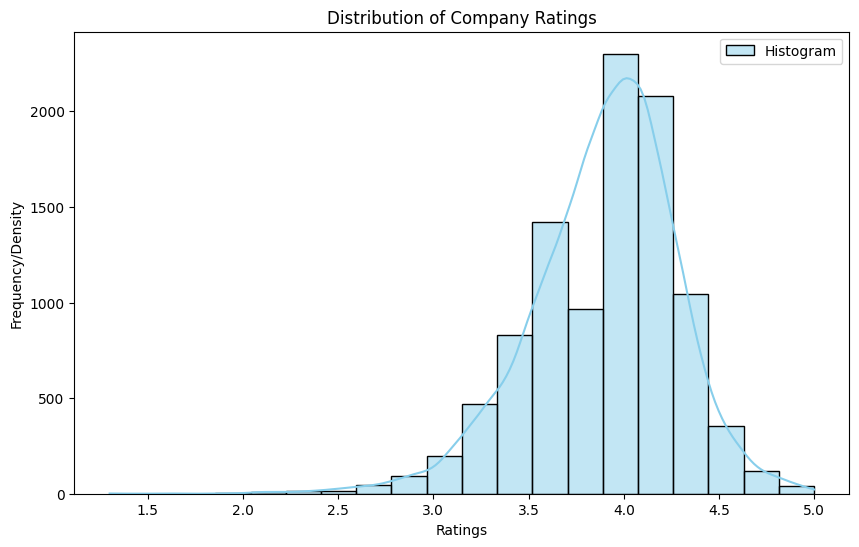

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("companies.csv")

# Plotting
plt.figure(figsize=(10, 6))

# Histogram & Density
sns.histplot(df['Ratings'], bins=20, kde=True, color='skyblue', label='Histogram')

# Title and labels
plt.title('Distribution of Company Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency/Density')
plt.legend()
plt.show()


**Interpretation**:
The histogram provides a visual representation of the distribution of company ratings, showcasing the frequency of ratings across the dataset. On the other hand, the density plot offers a smoothed representation of the probability density function of the ratings, providing insight into the likelihood of different ratings occurring.

From the plot, we can observe the distribution of ratings among the companies. We notice that the distribution is slightly skewed to the left, indicating that a larger proportion of companies have higher ratings compared to those with lower ratings. This skewness suggests that most companies in the dataset tend to receive positive ratings from users, although there are still variations in the ratings provided.

# 6. Using the provided dataset again, analyze the average salary across different industry sectors. Implement the following steps:

1. Group the data by industry sector (can be extracted from the Description) and calculate the mean salary for each sector.
2. Identify the top 10 and bottom 10 industry sectors based on average salary.
3. Concatenate the top and bottom sectors into a single DataFrame.
4. Visualize the top and bottom 10 average salaries by industry sector using a bar plot.

/tmp/ipykernel_1505/3127434825.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_salary', y='Industry_sector', data=top_bottom_sectors, palette='viridis')


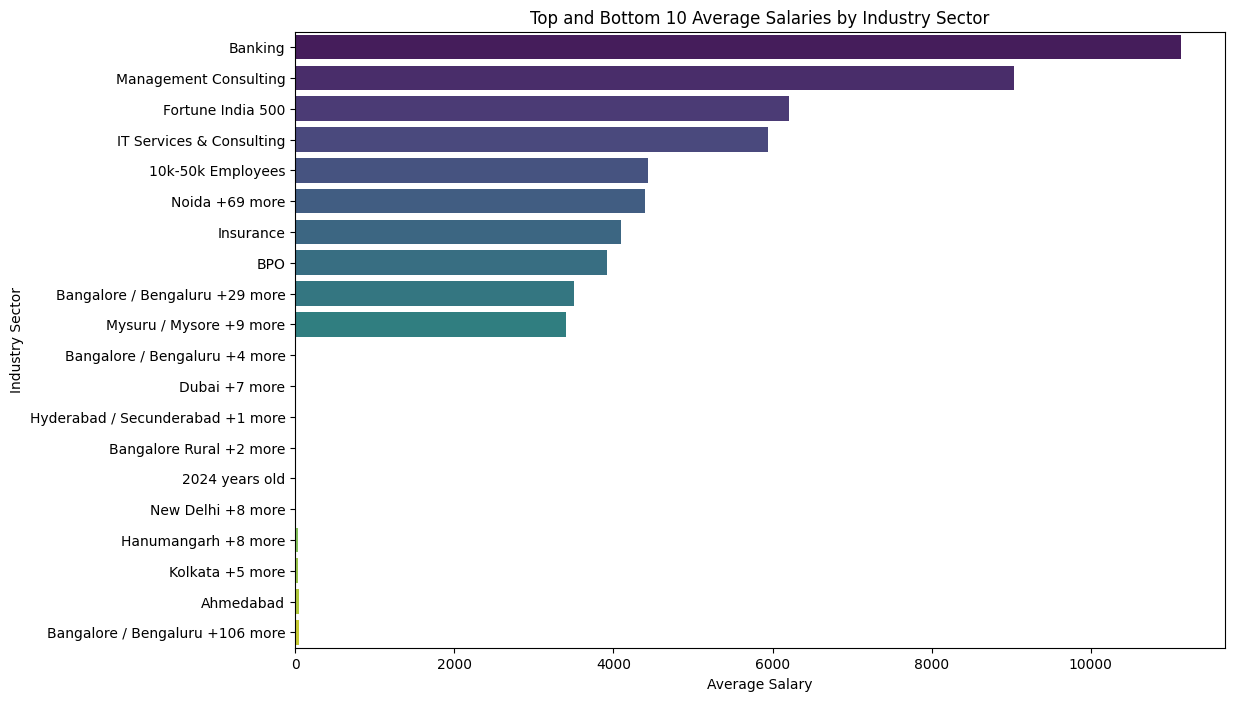

In [18]:
# Solution:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Function to convert 'k' to 1000 and handle values without 'k'
def convert_to_number(value):
    try:
        if 'k' in value:
            return float(value.replace('k', '')) * 1000
        else:
            return float(value)
    except ValueError:
        return np.nan  # Return NaN for non-convertible values

# Apply the function to the 'Interviews_taken' column
df['Avg_salary'] = df['Avg_salary'].apply(convert_to_number)

In [ ]:
# Extract industry sector from Description column
df['Industry_sector'] = df['Description'].str.split('|').str[0].str.strip()

# Group data by industry sector and calculate the mean salary for each sector
sector_mean_salary = df.groupby('Industry_sector')['Avg_salary'].mean().reset_index()

# Identify the top 10 and bottom 10 industry sectors based on average salary
top_10_sectors = sector_mean_salary.nlargest(10, 'Avg_salary')
bottom_10_sectors = sector_mean_salary.nsmallest(10, 'Avg_salary')

# Concatenate the top and bottom sectors into a single DataFrame
top_bottom_sectors = pd.concat([top_10_sectors, bottom_10_sectors])

# Visualize the top and bottom 10 average salaries by industry sector using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_salary', y='Industry_sector', data=top_bottom_sectors, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Industry Sector')
plt.title('Top and Bottom 10 Average Salaries by Industry Sector')
plt.show()

# 7. From the dataset provided in HW3:
Create a bar plot to display the top 10 companies based on their ratings.

/tmp/ipykernel_1505/933474930.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ratings', y='Company_name', data=top_10_companies, palette='viridis')


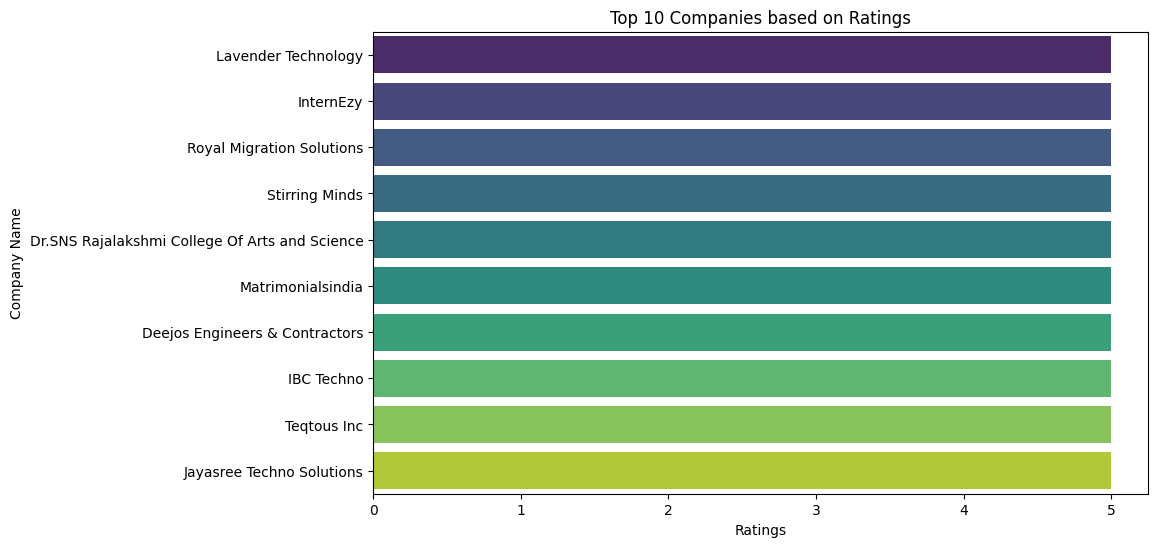

In [19]:
# Solution:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the data by ratings in descending order and select the top 10 companies
top_10_companies = df.nlargest(10, 'Ratings')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ratings', y='Company_name', data=top_10_companies, palette='viridis')
plt.xlabel('Ratings')
plt.ylabel('Company Name')
plt.title('Top 10 Companies based on Ratings')
plt.show()


# 8. From the dataset provided in HW3:
a. Following the analysis in question 2 part i, where outliers in the "Avg_salary" column were identified, now visualize them using a boxplot.
b. Create a boxplot for the "Avg_salary" column categorized by 5 samples of sectors.

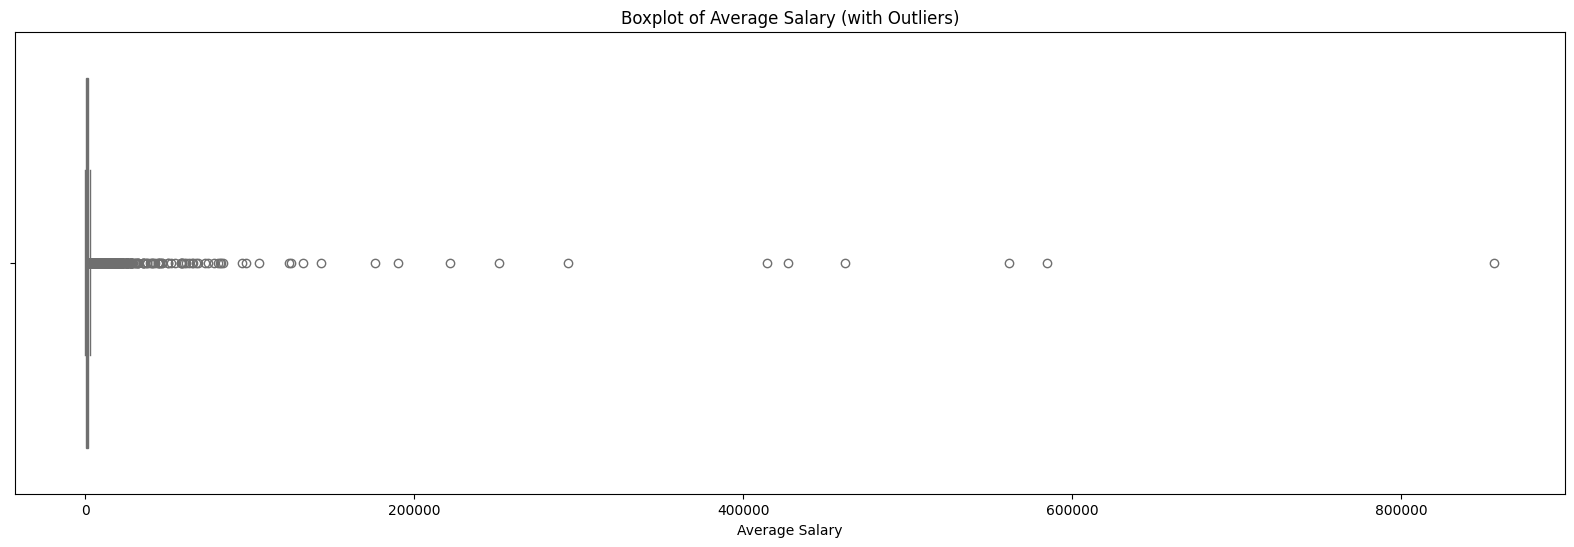

/tmp/ipykernel_1505/1130530884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Industry_sector', y='Avg_salary', data=sample_data, palette='viridis')


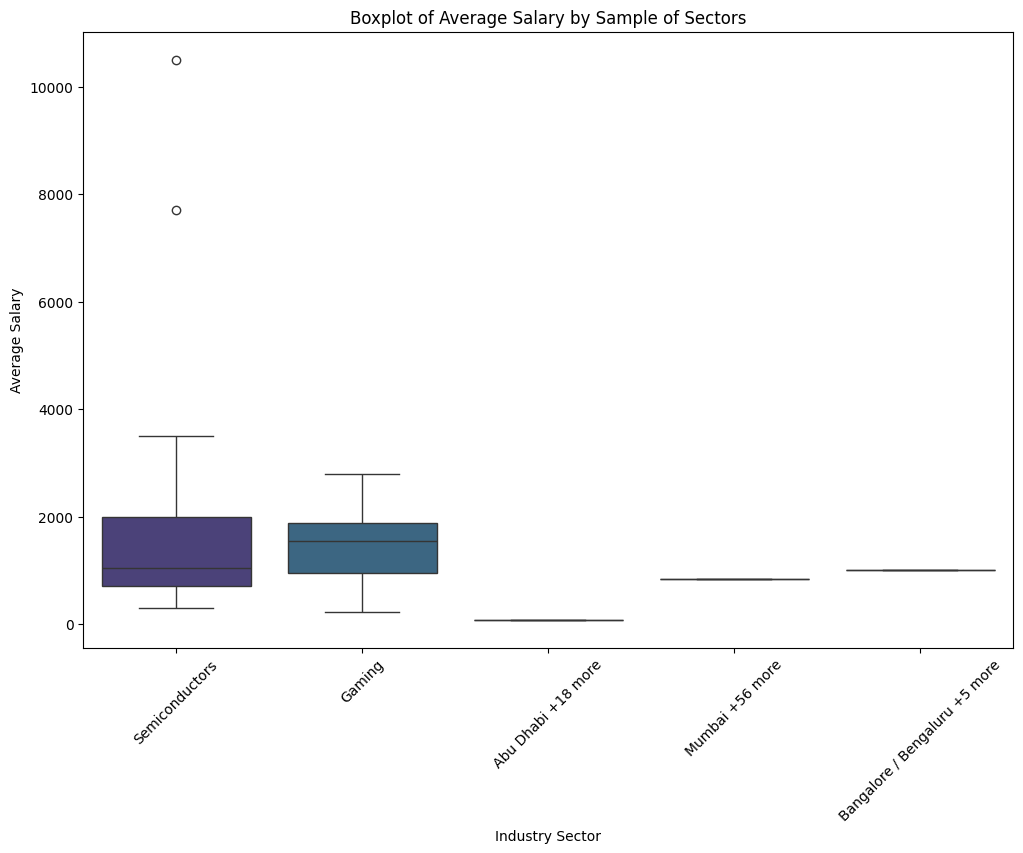

In [25]:
# Solution:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random


# a. Visualize outliers in the "Avg_salary" column using a boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['Avg_salary'], color='skyblue')
plt.xlabel('Average Salary')
plt.title('Boxplot of Average Salary (with Outliers)')
plt.show()

# b. Generate a boxplot for the "Avg_salary" column categorized by sector
# Select a random sample of sectors
sample_sectors = random.sample(df['Industry_sector'].unique().tolist(), 5)

# Filter the data for the selected sample of sectors
sample_data = df[df['Industry_sector'].isin(sample_sectors)]

# Create the boxplot for the "Avg_salary" column categorized by the sample of sectors
plt.figure(figsize=(12, 8))
sns.boxplot(x='Industry_sector', y='Avg_salary', data=sample_data, palette='viridis')
plt.xlabel('Industry Sector')
plt.ylabel('Average Salary')
plt.title('Boxplot of Average Salary by Sample of Sectors')
plt.xticks(rotation=45)
plt.show()
